# IMPORT OF LIBRAIRIES 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import calendar
from functions import *

# INTRODUCTION

In this section, we will present our procedure to identify the major events related to climate change that took place during the scope of our study.
To simplify our presentation we will focus on the year 2020 but this procedure will be extended to the entire data set later on.
The objective is to identify the date of these events by determining the days where the number of citations related to climate change is the most important.
We have therefore built a preliminary lexicon containing the terms most frequently used by speakers commenting about the climate emergency ( such as "climate change", "COP26",...)
This lexicon is a first draft and will be improved later by a more precise method involving a larger lexicon or a more advanced selection method.
With this lexicon we can filter our data and create a dataframe containing only the climate-related quotations for each year and this reduced dataframes will be used throughout our study.
Every dataframes and methodology to construct them can be found in notebook "Playground"

In this notebook we use only the dataframe for the year 2020

After building these dataframe, we can identify the days where the number of quotes related to climate is the most important.
Finally, we can identify the most frequently used words by the speakers and thus try to determine if a significant event took place on the day of this peak in the number of quotations



### LOADING DATA SET FOR THE YEAR 2020

In [23]:
quotes_2020 = pd.io.json.read_json('quotes-2020_climate.json.bz2', lines = True)

### Creation of a column containing the month when the month when the quote was reported


In [24]:
quotes_2020['month'] = quotes_2020['date'].dt.month.apply(lambda x: calendar.month_abbr[x])   
quotes_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,nationality,gender,ethnic_group,occupation,party,religion,date_of_birth,month
0,2020-02-27-004325,And it's also in the context of decades of utt...,None,[],2020-02-27 15:17:36,1,"[[None, 0.8786], [Bernie Sanders, 0.1214]]",[http://www.eenews.net/stories/1062457547],E,Thursday,None,None,None,None,None,None,NaN,Feb
1,2020-01-29-062975,Many make the link today between their experie...,Peter Maurer,"[Q117796, Q42426597]",2020-01-29 09:04:36,5,"[[Peter Maurer, 0.8787], [None, 0.1213]]",[http://whbl.com/news/articles/2020/jan/29/hun...,E,Wednesday,None,None,None,None,None,None,NaN,Jan
2,2020-02-10-076321,the National Energy and Climate Plans are how ...,Kadri Simson,[Q13570003],2020-02-10 05:51:51,1,"[[Kadri Simson, 0.9269], [None, 0.0504], [Gret...",[https://www.politico.eu/newsletter/brussels-p...,E,Monday,Estonia,female,None,politician,Estonian Centre Party,None,+1977-01-22T00:00:00Z,Feb
3,2020-01-06-069057,"This budget also allows us to earmark £ 500,00...",John Whitehead,"[Q55436000, Q58150131, Q6263827, Q6263833, Q62...",2020-01-06 11:49:00,1,"[[John Whitehead, 0.7971], [None, 0.2029]]",[https://www.buryfreepress.co.uk/news/draft-bu...,E,Monday,None,None,None,None,None,None,NaN,Jan
4,2020-03-10-005294,"As a state, we will pursue every option availa...",Kate Brown,"[Q16727692, Q6375399]",2020-03-10 20:47:28,2,"[[Kate Brown, 0.7275], [None, 0.2726]]",[http://www.courthousenews.com/oregon-governor...,E,Tuesday,None,None,None,None,None,None,NaN,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,2020-02-05-114487,We will be an energetic champion of free trade...,Dominic Raab,[Q268584],2020-02-05 16:30:31,2,"[[Dominic Raab, 0.8813], [None, 0.0998], [Geor...",[http://forbesadvocate.com.au/story/6616761/au...,E,Wednesday,United Kingdom,male,None,"[politician, lawyer]",Conservative Party,None,+1974-02-25T00:00:00Z,Feb
10222,2020-02-21-007763,Both urgent and long-term actions are needed t...,None,[],2020-02-21 20:23:47,1,"[[None, 0.7482], [Greta Thunberg, 0.2518]]",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Friday,None,None,None,None,None,None,NaN,Feb
10223,2020-04-10-020959,If we re-elect Donald Trump because we have tu...,None,[],2020-04-10 00:00:00,1,"[[None, 0.5234], [Mike Doyle, 0.4509], [Jim Bu...",[http://wesa.fm/post/mike-doyle-face-progressi...,E,Friday,None,None,None,None,None,None,NaN,Apr
10224,2020-02-10-057505,"Obama got health care, Trump got his tax cut, ...",Tom Steyer,[Q16189531],2020-02-10 11:00:08,1,"[[Tom Steyer, 0.8143], [None, 0.1857]]",[https://thebulletin.org/2020/02/on-the-new-ha...,E,Monday,United States of America,male,None,"[businessperson, organizational founder, phila...",Democratic Party,None,+1957-06-27T00:00:00Z,Feb


In [25]:
quotes_2020['date'] = quotes_2020['date'].dt.date

### Here create a serie containing the number of quotations per day in descending order 

In [26]:
quotes_date_occurence = quotes_2020.groupby('date').date.count()
quotes_date_occurence = quotes_date_occurence.sort_values(ascending= False)
quotes_date_occurence.head(5)

date
2020-01-14    248
2020-01-15    228
2020-01-21    221
2020-02-06    219
2020-02-07    213
Name: date, dtype: int64

### We then select  the quotations reported on peak days 

In [27]:
top_ten_days = quotes_date_occurence.index[:10].astype(str)
quotations_peak  = quotes_2020[quotes_2020['date'].astype(str).apply(lambda x: x in top_ten_days.to_list())]

## Plot of the number of quotations reported per day 

Text(0.5, 1.0, 'Number of quotations reported per day ')

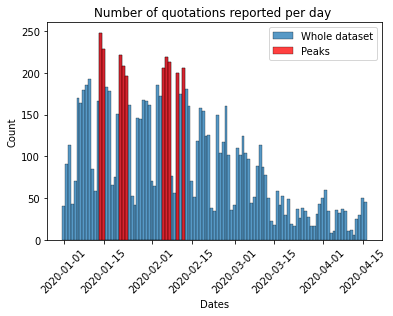

In [33]:
sns.histplot(quotes_2020['date'], bins = len(quotes_date_occurence), label = "Whole dataset")
sns.histplot(quotations_peak['date'], color = 'red', label = "Peaks") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()
plt.title('Number of quotations reported per day ')


## Plot of the quotations reported per month

Text(-2.450000000000003, 0.5, 'Count')

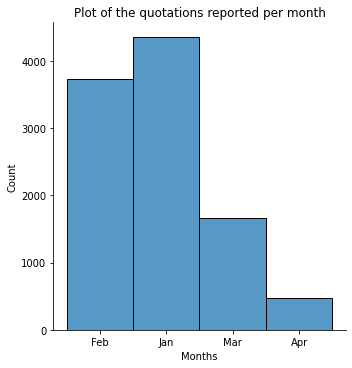

In [29]:
sns.displot(quotes_2020['month'])
plt.title('Plot of the quotations reported per month')
plt.xlabel("Months")
plt.ylabel("Count")

##  Identification of  the most frequently used words by the speakers when the peak occured

The goal here is to observe the most frequent words, and see if we can establish a link to a particular event.


## First we will look at the frequency of  words starting with a capital letter 

We do this in order to to find more easily the countries where these major events occured or the names of some  people.
These words can be very useful keywords.

In [30]:
key_capital_words = []
top_ten_days = quotes_date_occurence.index[:10].astype(str)
for d in top_ten_days:
    _, capital_words = capital_letter_keywords(quotes_2020, d)
    key_capital_words.append(capital_words)


 We show in the following dataframe, the most frequent keywords starting with a capital letter for the 10 days where quotations on climate change were predominant.

In [31]:
top_ten_day_key_words_capital = pd.DataFrame(key_capital_words, index = quotes_date_occurence.index[:10]).fillna(0)
top_ten_day_key_words_capital

,Australia,BlackRock,Minister,Canada,UK,Government,Michaels,COP26,BP,Glasgow,Scottish,Britain,Greta,Trump
date,,,,,,,,,,,,,,
2020-01-14,21.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-15,13.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,0.0,0.0,0.0,0.0,14.0,8.0,0.0,12.0,8.0,8.0,7.0,0.0,0.0,0.0
2020-02-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,7.0,0.0


Next we look at the frequency of all words.

 This time, we show in the following dataframe, the most frequent keywords for the 10 days where quotations on climate change were predominant.

In [15]:
keywords = []
top_ten_days = quotes_date_occurence.index[:10].astype(str)
for d in top_ten_days:
    _, words = all_keywords(quotes_2020, d)
    keywords.append(words)

In [16]:
top_ten_day_keywords = pd.DataFrame(keywords, index = quotes_date_occurence.index[:10]).fillna(0)
top_ten_day_keywords

,people,Australia,need,around,fire,impacts,country,much,economy,address,...,communities,COP26,already,life,health,would,year,nuclear,state,political
date,,,,,,,,,,,,,,,,,,,,,
2020-01-14,26.0,21.0,17.0,16.0,15.0,15.0,14.0,14.0,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-15,21.0,13.0,14.0,12.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,22.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,15.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,21.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,18.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,18.0,0.0,33.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0,...,12.0,12.0,11.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0
2020-02-10,26.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0


From the different results, we see that "Australia" and "fire" are amidst the most frequent words
on the 14th of January.

This indicates that the event that "boosted" the number of quotes about the climate during this time is probably the big australian wildfires that began at the end of 2019. We should explore this option now.


##  We therefore explore what happened on the 14th of  january...

The most important peak occured on the 14th of January. 

We will then, try to determine if a particular event occured.

In [17]:
filtered_sentence_df_australia,count_capital_keywords_australia =  capital_letter_keywords(
    quotes_2020, '2020-01-14')
_,count_keywords_australia = all_keywords(quotes_2020, '2020-01-14' )


In [18]:
count_capital_keywords_australia

Australia    21
BlackRock    11
dtype: int64

In [19]:
count_keywords_australia 

people       26
Australia    21
need         17
around       16
fire         15
impacts      15
country      14
much         14
economy      13
address      13
emergency    13
energy       13
dtype: int64

From these previous results, evidences accumulate on the nature of this peak. In order to validate it with a manual manipulation, we try to look for the word "bushfire" on this date here below. We observe 14 occurences. This is way too specific to be a coincidence.

In [20]:
filtered_sentence_df_australia.str.contains('bushfire').sum()

14

This link from this precise period validates our expectation : https://edition.cnn.com/2020/01/01/australia/australia-fires-explainer-intl-hnk-scli/index.html